# Описание:  
Анализ данных компании по аренде самокатов GoFast и проверка некоторых гипотез которые могут помочь в бизнесе 

```
--Шаг 1. Загрузка данных
    -1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:
        /datasets/users_go.csv
        /datasets/rides_go.csv
        /datasets/subscriptions_go.csv
    -1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.
--Шаг 2. Предобработка данных
    -2.1 Приведите столбец date к типу даты pandas.
    -2.2 Создайте новый столбец с номером месяца на основе столбца date.
    -2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.
--Шаг 3. Исследовательский анализ данных
Опишите и визуализируйте общую информацию о пользователях и поездках:
    -3.1 частота встречаемости городов;
    -3.2 соотношение пользователей с подпиской и без подписки;
    -3.3 возраст пользователей;
    -3.4 расстояние, которое пользователь преодолел за одну поездку;
    -3.5 продолжительность поездок.
--Шаг 4. Объединение данных
    -4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().
    -4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
        c данными о пользователях без подписки;
        с данными о пользователях с подпиской.
    -4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.
--Шаг 5. Подсчёт выручки
    -5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние,          количество поездок и суммарное время для каждого пользователя за каждый месяц.
    -5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях      оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости         округляется до следующего целого числа
--Шаг 6. Проверка гипотез
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
    -6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для          компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
    -6.2 Расстояние одной поездки в 
        3130
        3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской          за одну поездку, не превышает 3130 метров? 
    -6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. 
    -6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что           из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве                 обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats as st
import numpy as np

## Загрузка данных

In [2]:
df_users = pd.read_csv('/datasets/users_go.csv')
df_rides = pd.read_csv('/datasets/rides_go.csv')
df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
df_users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
df_rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
df_subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


## Предобработка данных

In [6]:
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')
df_rides['month'] = df_rides['date'].dt.month

In [7]:
df_users.info()
print('количесвто дубликатов: ', df_users['user_id'].duplicated().sum())
df_users = df_users.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
print('количесвто дубликатов и info после команды: ', df_users['user_id'].duplicated().sum(), df_users.info())
print(df_users['city'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
количесвто дубликатов:  31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB
к

Пропуски не обноружел, поиск дубликатов провел только в столбце User_id и ручной поиск в городах так как данные в остальных столбцах могли повторятся (имя, подписка, возвраст)

In [8]:
df_rides.info()
print('количесвто дубликатов: ', df_rides.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB
количесвто дубликатов:  0


пропусков и дубликатов нет(огромное спасибо яндекс)

#### Шаг 3. Исследовательский анализ данных

<h3><b>Частота встречаемости городов</b></h3>

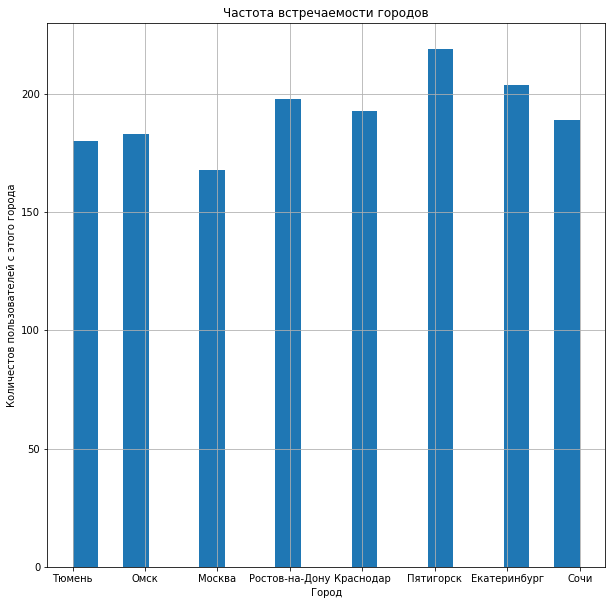

,user_id
city,
Екатеринбург,204
Краснодар,193
Москва,168
Омск,183
Пятигорск,219
Ростов-на-Дону,198
Сочи,189
Тюмень,180


In [9]:
plt.title('Частота встречаемости городов')
df_users['city'].hist(grid=True, figsize=(10,10), bins=20)
plt.xlabel('Город')
plt.ylabel('Количестов пользователей с этого города')
plt.show()
df_users.pivot_table(index='city', values='user_id', aggfunc='count')

встречаемость высше всего в пятегорске около 260, на втором месте по встречаемости 4 города Ростов, Краснодар, Екатеренбург, Сочи. Самый редкий город - Москва

### соотношение пользователей с подпиской и без подписк

проценть пользователей с подпиской 45.56714471968709
проценть пользователей без подписки 54.43285528031291


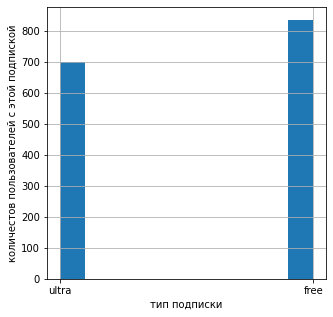

In [10]:
df_users['subscription_type'].hist(grid=True, figsize=(5,5), bins=10)
plt.xlabel('тип подписки')
plt.ylabel('количестов пользователей с этой подпиской')
print(f'проценть пользователей с подпиской', df_users.query('subscription_type=="ultra"')['user_id'].count() / df_users['user_id'].count() * 100)
print(f'проценть пользователей без подписки', df_users.query('subscription_type=="free"')['user_id'].count() / df_users['user_id'].count() * 100)

пользовотелей с платной подпиской меньше но не значительно, примерно на 150

<h3><b>возраст пользователей</b></h3>

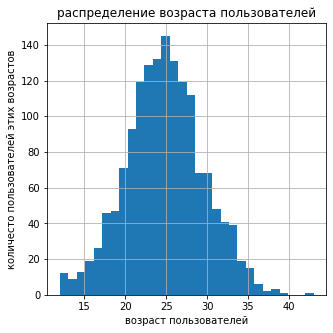

In [11]:
plt.title('распределение возраста пользователей')
df_users['age'].hist(grid=True, figsize=(5,5), bins=30)
plt.xlabel('возраст пользователей')
plt.ylabel('количесто пользователей этих возрастов')
plt.show()

в основном услугой пользуются люди 25 лет до и после 25 лет людей становится меньше и меньше

<p><h3><b>расстояние, которое пользователь преодолел за одну поездку</b></h3></p>

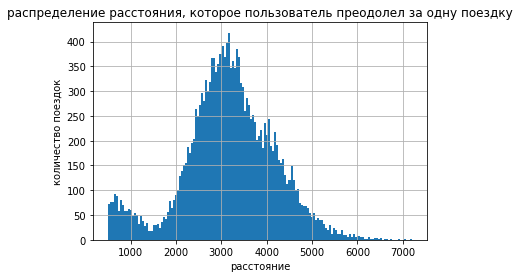

In [12]:
plt.title('распределение расстояния, которое пользователь преодолел за одну поездку')
df_rides.query('500<distance')['distance'].hist(bins=150)
plt.xlabel('расстояние')
plt.ylabel('количество поездок')
plt.show()

В анализ я взял поездки от 500 метров так как я считаю что это оптимальное растояние для которого следует брать самокат.
В среднем на самокате проезжают 3300 метров чем дальше от этого значения тем меньше было таких поездок  

<p><h3><b> продолжительность поездок</b></h3></p>

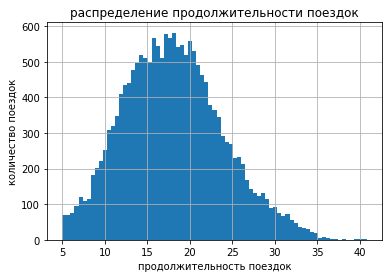

In [13]:
plt.title('распределение продолжительности поездок')
df_rides.query('5<duration')['duration'].hist(bins=75)
plt.xlabel('продолжительность поездок')
plt.ylabel('количество поездок')
plt.show()

Давольно популярны поездки по 16-17 очень редко встречаются по 40 и от 5-15 минут идет подьем количества поездок. в анализ брал поездки от 5 минут.

## Объединение данных

In [14]:
df = df_users.merge(df_rides, on='user_id')
df = df.merge(df_subscriptions, on='subscription_type')
print(df_rides['user_id'].count())
print(df['user_id'].count())
print(df.info())

18068
18068
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB
None


длина таблиц совпадает все прошло коректно, пропусков нет

In [15]:
df_ultra = df[df['subscription_type']=='ultra']
df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [16]:
df_free = df[df['subscription_type']=='free']
df_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


__С подпиской__ 

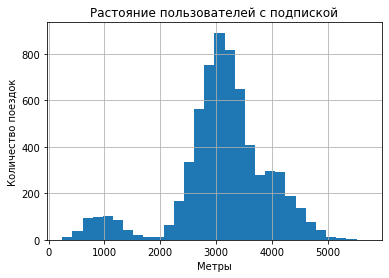

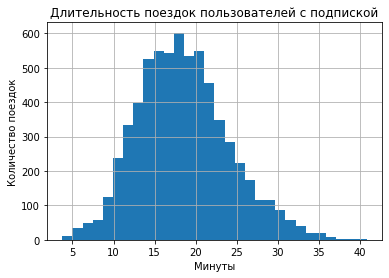

In [17]:
df_ultra['distance'].hist(bins=30)
plt.title('Растояние пользователей с подпиской')
plt.xlabel('Метры')
plt.ylabel('Количество поездок')
plt.show()
df_ultra['duration'].hist(bins=30)
plt.title('Длительность поездок пользователей с подпиской')
plt.xlabel('Минуты')
plt.ylabel('Количество поездок')
plt.show()

__Без подписки__

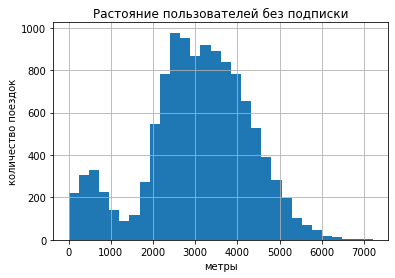

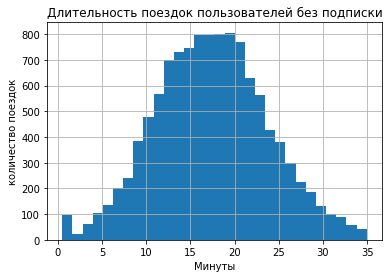

In [18]:
df_free['distance'].hist(bins=30)
plt.title('Растояние пользователей без подписки')
plt.xlabel('метры')
plt.ylabel('количество поездок')
plt.show()
df_free['duration'].hist(bins=30)
plt.title('Длительность поездок пользователей без подписки')
plt.xlabel('Минуты')
plt.ylabel('количество поездок')
plt.show()

больший разброс и по длительности и по дистанции у пользователей без подписки, так как их больше. У пользователей без подписки чаще встречаются короткие поездки до 500 метров это видно по небольшой горке в начале графика

## Подсчёт выручки

In [19]:
df['duration'] = np.ceil(df['duration'])
agg_data = df.pivot_table(index=['month', 'user_id'], values=['duration', 'distance', 'minute_price',  'start_ride_price', 'subscription_fee', 'name'], aggfunc={'name':'count', 'distance':'sum', 'duration':'sum'})
help1=df.pivot_table(index=['month', 'user_id'], values=['minute_price',  'start_ride_price', 'subscription_fee'])
agg_data = agg_data.merge(help1,on=['month', 'user_id'])
agg_data['paid'] = (agg_data['name'] * agg_data['start_ride_price']) + (agg_data['duration'] * agg_data['minute_price']) + agg_data['subscription_fee']
agg_data

distance  duration  name  minute_price  start_ride_price  \
month user_id                                                                
1     1        7027.511294      42.0     2             6                 0   
      3        3061.777147      13.0     1             6                 0   
      5        3914.646990      13.0     1             6                 0   
      7        6478.080979      28.0     2             6                 0   
      12       3577.151148      33.0     1             6                 0   
...                    ...       ...   ...           ...               ...   
12    1525     4597.854350      34.0     1             8                50   
      1526     3644.121544      23.0     1             8                50   
      1528     3998.569324      11.0     1             8                50   
      1532     6111.889853      42.0     2             8                50   
      1534     2371.711192      16.0     1             8                50   

               subscription_fee   paid  
month user_id                           
1     1                     199  451.0  
      3                     199  277.0  
      5                     199  277.0  
      7                     199  367.0  
      12                    199  397.0  
...                         ...    ...  
12    1525                    0  322.0  
      1526                    0  234.0  
      1528                    0  138.0  
      1532                    0  436.0  
      1534                    0  178.0  

[11331 rows x 7 columns]

name - количество поездок

## Проверка гипотез

H0 = пользователи с подпиской и без тратят одинакого времени
H1 = пользователи с подпиской тратят больше времени чем пользователм без подписки

In [20]:
res = st.ttest_ind(
    df.query('user_id in @df_ultra["user_id"]')['duration'],
    df.query('user_id in @df_free["user_id"]')['duration'],
    alternative='greater'
)
print(res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
    print('нулевая гипотеза отвергнута')
else:
    print('не отвергаем')

2.4959453720736625e-34
нулевая гипотеза отвергнута


пользователи с подпиской берут самокаты на большее время

H0 = растояние которое проезжают пользователи с подпиской меньше либо ровно 3130 H1 = растояние которое проезжают пользователи с подпиской больше 3130

In [21]:
res = st.ttest_1samp(
    df.query('user_id in @df_ultra["user_id"]')['distance'],
    3130,
    alternative='greater'
)
print(res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
    print('нулевая гипотеза отвергнута')
else:
    print('не отвергаем')

0.9195368847849785
не отвергаем


растояние которое преодоливает пользователь с подпиской меньше или равно 3130

H0 = пользователи с подпиской и без тратят одинакого денег H1= пользователи с подпиской тратят больше денег чем пользователи без подписки 

In [22]:

res = st.ttest_ind(
    agg_data.query('user_id in @df_ultra["user_id"]')['paid'],
    agg_data.query('user_id in @df_free["user_id"]')['paid'],
    alternative='greater'
)
print(res.pvalue)
alpha = 0.05
if res.pvalue < alpha:
    print('нулевая гипотеза отвергнута')
else:
    print('не отвергаем')

1.8850394384715216e-31
нулевая гипотеза отвергнута


 пользователи с подпиской тратят больще денег чем пользователи без нее

буду использовать тест для проверки двух зависимых генеральных совокупностей st.ttest_rel() одностороняя гипотеза 

## Вывод

__Общий вывод__: был провиден анализ данных, дубликаты не бфли найдены, встречаемость высше всего в пятегорске около 260, на втором месте по встречаемости 4 города Ростов, Краснодар, Екатеренбург, Сочи. Самый редкий город - Москва, в основном услугой пользуются люди 25 лет до и после 25 лет людей становится меньше и меньше, больший разброс и по длительности и по дистанции у пользователей без подписки, при проверке гипотез выяснил что выяснил:

1.пользователи с подпиской беркт самокаты на большее время

2.пользователи преодолевают на самокате обычно не больше 3130 метров

3.пользователи с подпиской тратят больще денег чем пользователи без нее